Milestone2


In [99]:

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np

#upload kaggle.json for api access
# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


Dataset available at: https://www.kaggle.com/datasets/tonygordonjr/football-match-statistics-and-more/data?fbclid=IwZXh0bgNhZW0CMTEAAR27HPyyqC9nUioeOqJzVzznFoIH3SNY0xcdZ_4dDxEpDOoRnZgcaXdTTRE_aem_0dX5wF1-vk6WmlQWZMnQ2g

In [100]:
# !kaggle datasets download -d tonygordonjr/football-match-statistics-and-more
# !unzip /content/football-match-statistics-and-more.zip -d ./

Dataset URL: https://www.kaggle.com/datasets/tonygordonjr/football-match-statistics-and-more
License(s): other
football-match-statistics-and-more.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/football-match-statistics-and-more.zip
replace ./coaches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_events_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_injuries_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_lineup_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_stats_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_stats_players_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./fixture_stats_teams_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./season_standings_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./season_stats_teams_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./venues.cs

In [101]:
teams_clean_col = ['fixture_id', 'team_id', 'team_name', 'fouls','yellow_cards', 'red_cards','ball_possession','total_passes','completed_passes', 'pass_percentage', 'assists', 'goals','expected_goals', 'shots_on_goal', 'shots_off_goal', 'shots_insidebox','shots_outsidebox', 'total_shots', 'blocked_shots','corner_kicks', 'offsides']
stats_clean_col = ['fixture_id', 'fixture_date', 'fixture_referee', 'league_id', 'league_name', 'teams_home_id', 'teams_home_name', 'teams_away_id', 'teams_away_name']
players_clean_col = ['fixture_id', 'team_id', 'team_name', 'player_id', 'player_name','fouls_drawn','fouls_committed', 'yellow_cards', 'red_cards', 'game_minutes']

fix_teams_clean = pd.read_csv("fixture_stats_teams_clean.csv",usecols=teams_clean_col)
fix_clean = pd.read_csv("fixture_stats_clean.csv", usecols=stats_clean_col)
fix_players_clean = pd.read_csv("fixture_stats_players_clean.csv",usecols=players_clean_col)
season_standings = pd.read_csv("season_standings_clean.csv",usecols=['team_id','rank','form','played_all','wins_all', 'draws_all', 'losses_all', 'goals_for_all','last_updated'])


In [102]:
season_standings['wins'] = season_standings['form'].str.count('W').replace(np.nan, 0)
season_standings['draws'] = season_standings['form'].str.count('D').replace(np.nan, 0)
season_standings['losses'] = season_standings['form'].str.count('L').replace(np.nan, 0)
season_standings=season_standings.drop(columns=['form'])

In [103]:
season_standings['win_ratio'] = season_standings['wins_all'] / season_standings['played_all'].replace(np.nan, 0)
season_standings['draw_ratio'] = season_standings['draws_all'] / season_standings['played_all'].replace(np.nan, 0)
season_standings['loss_ratio'] = season_standings['losses_all'] / season_standings['played_all'].replace(np.nan, 0)
season_standings['goal_per_game'] = season_standings['goals_for_all'] / season_standings['played_all'].replace(np.nan, 0)
season_standings=season_standings.drop(columns=['wins_all','draws_all','losses_all','goals_for_all','played_all'])

In [104]:
season_standings # ez most meg nincs berakva sehgova sem

,rank,team_id,last_updated,wins,draws,losses,win_ratio,draw_ratio,loss_ratio,goal_per_game
0,2,529.0,2024-05-29 00:00:00 UTC,4.0,0.0,1.0,0.684211,0.184211,0.131579,2.078947
1,3,547.0,2024-05-29 00:00:00 UTC,3.0,1.0,1.0,0.657895,0.157895,0.184211,2.236842
2,16,534.0,2024-05-29 00:00:00 UTC,0.0,3.0,2.0,0.263158,0.263158,0.473684,0.868421
3,19,723.0,2024-05-29 00:00:00 UTC,2.0,1.0,2.0,0.078947,0.315789,0.605263,1.131579
4,11,727.0,2024-05-29 00:00:00 UTC,1.0,3.0,1.0,0.315789,0.236842,0.447368,1.184211
...,...,...,...,...,...,...,...,...,...,...
2904,1,2287.0,2016-12-04 00:00:00 UTC,0.0,0.0,0.0,0.750000,0.250000,0.000000,2.250000
2905,3,1603.0,2016-12-04 00:00:00 UTC,0.0,0.0,0.0,0.250000,0.250000,0.500000,0.500000
2906,3,4308.0,2016-12-04 00:00:00 UTC,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.750000
2907,1,2279.0,2016-12-04 00:00:00 UTC,0.0,0.0,0.0,0.500000,0.500000,0.000000,1.250000


In [105]:
pd.to_datetime(fix_clean['fixture_date'])
pd.to_datetime(season_standings['last_updated'])


,last_updated
0,2024-05-29 00:00:00+00:00
1,2024-05-29 00:00:00+00:00
2,2024-05-29 00:00:00+00:00
3,2024-05-29 00:00:00+00:00
4,2024-05-29 00:00:00+00:00
...,...
2904,2016-12-04 00:00:00+00:00
2905,2016-12-04 00:00:00+00:00
2906,2016-12-04 00:00:00+00:00
2907,2016-12-04 00:00:00+00:00


In [106]:
# team ids are actual identifiers (not like player_ids)
fix_teams_clean.groupby(['team_id', 'team_name']).size().reset_index().team_name.value_counts()

,count
team_name,
Bay FC,1
Belgium,1
France,1
Robin Hood,1
Al Riyadh,1
...,...
Colombia,1
Uruguay,1
Brazil,1


In [107]:
# fixture_date added to the players statistics for further data preparation purposes: fix_players_clean
fix_players_clean = fix_players_clean.merge(fix_clean[['fixture_id', 'fixture_date']], on='fixture_id', how='left')
# fix_players_clean = fix_players_clean_og.copy()

A run_mode beállításával lehet meghatározni a célváltozót: total=fogadóirodák által számolt lapérték. yellow=csak sárga. red=csak piros. Az adatelőkészítés végén kimentődik a megfelelő dataframe-be (yellow_final, total_final, red_final), és a tanítás előtt is lehet run_mode-ot állítani, és az meg a megfelelő célváltozójú, előfeldogozott adatsetet (yellow_final, total_final, red_final) tölti be és arra épít modellt, ha az létezik.

In [108]:
# Összes kapott lap kiszámítása minden játékosra: fix_players_clean
run_mode = 'yellow' #(total, yellow, red)
if run_mode == 'total':
  fix_players_clean['total_cards'] = fix_players_clean.apply(lambda x: x['yellow_cards'] + x['red_cards'] * 2 if x['yellow_cards'] != 2 else 3, axis=1)
elif run_mode == 'yellow':
  fix_players_clean['total_cards'] = fix_players_clean['yellow_cards']
elif run_mode == 'red':
  fix_players_clean['total_cards'] = fix_players_clean['red_cards']
else:
  raise ValueError("Invalid run_mode. Must be 'total', 'yellow', or 'red'.")
fix_players_clean.drop(['yellow_cards', 'red_cards'], axis=1, inplace=True)

In [109]:
# Összes kapott lap kiszámítása minden játékosra: fix_players_clean
#fix_players_clean['total_cards'] = fix_players_clean.apply(lambda x: x['yellow_cards'] + x['red_cards'] * 2 if x['yellow_cards'] != 2 else 3, axis=1)
# fix_players_clean.sort_values('red_cards', ascending=False).head()

#fix_players_clean.drop(['yellow_cards', 'red_cards'], axis=1, inplace=True)

In [110]:
# Játékosok kidobása ha game_minutes isna: fix_players_clean
# Ezek a pályán kívül kapott lapok amik nem számítanak bele az összes lap számába a fogadóirodáknál
# fix_players_clean[(fix_players_clean['game_minutes'].isna()) & (fix_players_clean['total_cards'] != 0)].sort_values(by=['total_cards', 'fixture_date'], ascending=[False, False])

fix_players_clean.drop(fix_players_clean[fix_players_clean["game_minutes"].isna()].index, inplace=True)
fix_players_clean["game_minutes"].isna().sum()

np.int64(0)

In [111]:
# Összes kapott lap kiszámításra minden csapatra minden meccsen: fix_total_cards
fix_total_cards = fix_players_clean.groupby(['fixture_id', 'team_id'])['total_cards'].sum().reset_index()
fix_total_cards = fix_total_cards.merge(fix_clean[['fixture_id', 'fixture_date']], on='fixture_id', how='left')

In [112]:
fix_total_cards

,fixture_id,team_id,total_cards,fixture_date
0,65,33,2,2018-08-10 19:00:00 UTC
1,65,46,1,2018-08-10 19:00:00 UTC
2,66,34,2,2018-08-11 11:30:00 UTC
3,66,47,2,2018-08-11 11:30:00 UTC
4,67,35,1,2018-08-11 14:00:00 UTC
...,...,...,...,...
64871,1316662,1602,2,2024-12-01 00:30:00 UTC
64872,1316663,1595,4,2024-12-01 03:00:00 UTC
64873,1316663,1605,0,2024-12-01 03:00:00 UTC
64874,1318600,1602,2,2024-12-07 21:00:00 UTC


In [113]:
# Sort by team and fixture_date to ensure past matches come first
fix_total_cards = fix_total_cards.sort_values(by=["team_id", "fixture_date"])

fix_total_cards['matches_last_14_days'] = 0
fix_total_cards['fixture_date'] = pd.to_datetime(fix_total_cards['fixture_date'])

for index, row in fix_total_cards.iterrows():
    team = row['team_id']
    date = row['fixture_date']

    # Filter past fixtures for this team in the last 14 days
    past_games = fix_total_cards[(fix_total_cards['team_id'] == team) &
                           (fix_total_cards['fixture_date'] < date) &
                           (fix_total_cards['fixture_date'] >= date - pd.Timedelta(days=14))]

    # Store count
    fix_total_cards.at[index, 'matches_last_14_days'] = len(past_games)


# Compute past average total cards for each team
fix_total_cards["avg_total_cards"] = (
    fix_total_cards.groupby("team_id")["total_cards"]
    .expanding()
    .mean()
    .shift()  # Shift to exclude current row from the average
    .reset_index(level=0, drop=True)
)

# Minden csapat legkorábbi meccsét dropoljuk, mert az avg_total_cards értéke ott nem megállapítható
fix_total_cards = fix_total_cards.drop(fix_total_cards.groupby('team_id')['fixture_date'].idxmin())

fix_total_cards.head()

,fixture_id,team_id,total_cards,fixture_date,matches_last_14_days,avg_total_cards
19892,152605,1,1,2016-06-18 13:00:00+00:00,1,1.000000
19920,152619,1,2,2016-06-22 19:00:00+00:00,2,1.000000
19836,152574,1,3,2016-06-26 19:00:00+00:00,3,1.333333
19842,152578,1,2,2016-07-01 19:00:00+00:00,3,1.750000
16950,135789,1,3,2018-06-18 15:00:00+00:00,0,1.800000


In [114]:
# Meccsek adataihoz hozzá adjuk a csapatok átlagos kártyáit: fix_total_cards (és cards_tmp)
# Hazai hozzáadása
cards_tmp = fix_clean.merge(fix_total_cards.drop("fixture_date", axis=1), on="fixture_id", how="inner")
cards_tmp = cards_tmp[cards_tmp["team_id"] == cards_tmp["teams_home_id"]]
cards_tmp = cards_tmp.rename(columns={"total_cards": "home_total_cards_value", "avg_total_cards": "avg_home_total_cards",'matches_last_14_days': 'home_matches_last_14_days'})
cards_tmp = cards_tmp.drop(columns=["team_id"])

# Vendég kártyáinak hozzáadása
cards_tmp = cards_tmp.merge(fix_total_cards.drop("fixture_date", axis=1), on="fixture_id", how="inner")
cards_tmp = cards_tmp[cards_tmp["team_id"] == cards_tmp["teams_away_id"]]
cards_tmp = cards_tmp.rename(columns={"total_cards": "away_total_cards_value", "avg_total_cards": "avg_away_total_cards", 'matches_last_14_days': 'away_matches_last_14_days'})
cards_tmp = cards_tmp.drop(columns=["team_id"])

cards_tmp["total_cards_value"] = cards_tmp["home_total_cards_value"] + cards_tmp["away_total_cards_value"]
cards_tmp


,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,home_total_cards_value,home_matches_last_14_days,avg_home_total_cards,away_total_cards_value,away_matches_last_14_days,avg_away_total_cards,total_cards_value
0,566789,2020-07-06 18:30:00 UTC,"Felix Brych, Germany",78,Bundesliga,180,FC Heidenheim,162,Werder Bremen,2,1,2.000000,2,2,2.035088,4
3,9822,2017-10-01 10:00:00 UTC,"Alfonso Alvarez Izquierdo, Spain",140,La Liga,548,Real Sociedad,543,Real Betis,3,4,2.535714,3,2,2.756098,6
5,203592,2016-02-27 21:05:00 UTC,"Alberto Undiano, Spain",140,La Liga,548,Real Sociedad,535,Malaga,4,2,3.000000,5,1,3.000000,9
7,203530,2016-01-16 21:05:00 UTC,"Juan Martinez Munuera, Spain",140,La Liga,548,Real Sociedad,544,Deportivo La Coruna,1,2,3.263158,3,2,2.578947,4
9,27416,2019-03-15 20:00:00 UTC,"Adrian Cordero Vega, Spain",140,La Liga,548,Real Sociedad,539,Levante,2,2,2.238095,2,2,3.165049,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64223,132923,2019-10-11 18:45:00 UTC,O. Hațegan,4,Euro Championship,777,Türkiye,778,Albania,3,0,2.000000,5,0,2.555556,8
64225,1299137,2024-09-26 16:45:00 UTC,"Benoît Bastien, France",3,UEFA Europa League,611,Fenerbahce,1393,Union St. Gilloise,4,0,2.666667,2,0,2.000000,6
64226,350229,2016-09-29 19:05:00 UTC,"Jonas Eriksson, Sweden",3,UEFA Europa League,611,Fenerbahce,209,Feyenoord,2,0,2.727273,3,0,1.000000,5
64228,971763,2023-02-16 17:45:00 UTC,I. Peljto,3,UEFA Europa League,550,Shakhtar Donetsk,94,Rennes,3,0,2.000000,3,2,1.807818,6


In [115]:
fix_total_cards = cards_tmp[['fixture_id', 'fixture_referee', 'fixture_date', 'home_total_cards_value', 'avg_home_total_cards','home_matches_last_14_days', 'away_total_cards_value', 'avg_away_total_cards', 'away_matches_last_14_days', 'total_cards_value']]

In [116]:
fix_total_cards

,fixture_id,fixture_referee,fixture_date,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value
0,566789,"Felix Brych, Germany",2020-07-06 18:30:00 UTC,2,2.000000,1,2,2.035088,2,4
3,9822,"Alfonso Alvarez Izquierdo, Spain",2017-10-01 10:00:00 UTC,3,2.535714,4,3,2.756098,2,6
5,203592,"Alberto Undiano, Spain",2016-02-27 21:05:00 UTC,4,3.000000,2,5,3.000000,1,9
7,203530,"Juan Martinez Munuera, Spain",2016-01-16 21:05:00 UTC,1,3.263158,2,3,2.578947,2,4
9,27416,"Adrian Cordero Vega, Spain",2019-03-15 20:00:00 UTC,2,2.238095,2,2,3.165049,2,4
...,...,...,...,...,...,...,...,...,...,...
64223,132923,O. Hațegan,2019-10-11 18:45:00 UTC,3,2.000000,0,5,2.555556,0,8
64225,1299137,"Benoît Bastien, France",2024-09-26 16:45:00 UTC,4,2.666667,0,2,2.000000,0,6
64226,350229,"Jonas Eriksson, Sweden",2016-09-29 19:05:00 UTC,2,2.727273,0,3,1.000000,0,5
64228,971763,I. Peljto,2023-02-16 17:45:00 UTC,3,2.000000,0,3,1.807818,2,6


In [117]:
# Sort by referee and fixture_date to ensure past matches come first
fix_total_cards = fix_total_cards.sort_values(by=["fixture_referee", "fixture_date"])

# Compute past average total cards for each referee
fix_total_cards["avg_referee_cards"] = (
    fix_total_cards.groupby("fixture_referee")["total_cards_value"]
    .expanding()
    .mean()
    .shift()  # Shift to exclude current row from the average
    .reset_index(level=0, drop=True)
)

# Minden referee legkorábbi meccsét dropoljuk, mert az avg_referee_cards értéke ott nem megállapítható
fix_total_cards = fix_total_cards.drop(fix_total_cards.groupby('fixture_referee')['fixture_date'].idxmin())

In [118]:
fix_total_cards

,fixture_id,fixture_referee,fixture_date,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards
22807,164203,A. Woolmer,2019-08-17 14:00:00 UTC,2,2.000000,1,1,1.871166,2,3,3.0
46230,164233,A. Woolmer,2019-08-25 11:00:00 UTC,1,1.335366,2,5,1.858696,2,6,3.0
1024,164245,A. Woolmer,2019-08-31 14:00:00 UTC,1,1.989691,3,5,1.680412,3,6,4.0
2534,164259,A. Woolmer,2019-09-21 14:00:00 UTC,1,1.623656,1,2,1.622754,1,3,4.5
24503,164287,A. Woolmer,2019-10-01 19:00:00 UTC,3,1.784211,2,0,1.802198,2,3,4.2
...,...,...,...,...,...,...,...,...,...,...,...
32556,657877,NaN,2021-05-30 18:00:00 UTC,2,2.068966,2,2,1.938776,2,4,NaN
32574,657882,NaN,2021-05-30 18:00:00 UTC,4,1.832000,2,5,2.007874,2,9,NaN
50921,657881,NaN,2021-05-30 18:00:00 UTC,3,1.674603,2,1,2.064000,1,4,NaN
56631,657879,NaN,2021-05-30 18:00:00 UTC,1,2.110236,2,3,2.342593,2,4,NaN


In [119]:
fix_total_cards.drop(fix_total_cards[fix_total_cards["fixture_referee"].isna()].index, inplace=True)

In [120]:
# Összes falt kiszámítása minden csapatra meccsenként: fix_total_fouls
fix_total_fouls = fix_teams_clean[["fixture_id", "team_id", "fouls","ball_possession",'total_passes','completed_passes', 'pass_percentage', 'assists', 'goals','expected_goals', 'shots_on_goal', 'shots_off_goal', 'shots_insidebox','shots_outsidebox', 'total_shots', 'blocked_shots','corner_kicks', 'offsides']]
fix_total_fouls.drop(fix_total_fouls[fix_total_fouls["fouls"] == 0].index, inplace=True)
fix_total_fouls = fix_total_fouls.merge(fix_clean[['fixture_id', 'fixture_date']], on='fixture_id', how='inner')

<ipython-input-120-dbd6d4a73005>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_total_fouls.drop(fix_total_fouls[fix_total_fouls["fouls"] == 0].index, inplace=True)


In [121]:
# Sort by team and fixture_date to ensure past matches come first
fix_total_fouls = fix_total_fouls.sort_values(by=["team_id", "fixture_date"])
fix_total_fouls['avg_possession_before'] = 0.0
fix_total_fouls["avg_possession_before"] = (
    fix_total_fouls.groupby("team_id")["ball_possession"]
    .expanding()
    .mean()
    .shift()  # Shift to exclude current row from the average
    .reset_index(level=0, drop=True)
)

In [122]:


# Compute past average total cards for each team
fix_total_fouls["avg_total_fouls"] = (
    fix_total_fouls.groupby("team_id")["fouls"]
    .expanding()
    .mean()
    .shift()  # Shift to exclude current row from the average
    .reset_index(level=0, drop=True)
)

In [123]:
avg_cols=['total_passes','completed_passes', 'pass_percentage', 'assists', 'goals','expected_goals', 'shots_on_goal', 'shots_off_goal', 'shots_insidebox','shots_outsidebox', 'total_shots', 'blocked_shots','corner_kicks', 'offsides']
for col in avg_cols:
  fix_total_fouls[f'avg_{col}_before']=0.0
  fix_total_fouls[f'avg_{col}_before'] = (
      fix_total_fouls.groupby("team_id")[col]
      .expanding()
      .mean()
      .shift()
      .reset_index(level=0, drop=True))
formatted_avg_cols = [f'avg_{col}_before' for col in avg_cols]

In [124]:
# Minden csapat legkorábbi meccsét dropoljk, mert az avg_total_fouls értéke ott nem megállapítható
fix_total_fouls = fix_total_fouls.drop(fix_total_fouls.groupby('team_id')['fixture_date'].idxmin())

In [125]:
fix_total_fouls.sort_values(by=["team_id", "fixture_date"]).head(10)

,fixture_id,team_id,fouls,ball_possession,total_passes,completed_passes,pass_percentage,assists,goals,expected_goals,shots_on_goal,shots_off_goal,shots_insidebox,shots_outsidebox,total_shots,blocked_shots,corner_kicks,offsides,fixture_date,avg_possession_before,avg_total_fouls,avg_total_passes_before,avg_completed_passes_before,avg_pass_percentage_before,avg_assists_before,avg_goals_before,avg_expected_goals_before,avg_shots_on_goal_before,avg_shots_off_goal_before,avg_shots_insidebox_before,avg_shots_outsidebox_before,avg_total_shots_before,avg_blocked_shots_before,avg_corner_kicks_before,avg_offsides_before
50307,152605,1,8,0.57,469,402,0.86,3,3,0.0,7,8,8,9,17,2,5,3,2016-06-18 13:00:00 UTC,0.560000,10.000000,525.000000,445.000000,0.850000,0.000000,0.000000,0.0,3.000000,6.000000,5.000000,13.000000,18.000000,9.000000,8.000000,1.000000
17785,152619,1,14,0.49,357,282,0.79,1,1,0.0,8,6,8,13,21,7,12,4,2016-06-22 19:00:00 UTC,0.565000,9.000000,497.000000,423.500000,0.855000,1.500000,1.500000,0.0,5.000000,7.000000,6.500000,11.000000,17.500000,5.500000,6.500000,2.000000
56292,152574,1,10,0.46,414,341,0.82,4,4,0.0,14,8,14,11,25,3,8,3,2016-06-26 19:00:00 UTC,0.540000,10.666667,450.333333,376.333333,0.833333,1.333333,1.333333,0.0,6.000000,6.666667,7.000000,11.666667,18.666667,6.000000,8.333333,2.666667
17780,152578,1,8,0.54,476,411,0.86,1,1,0.0,5,7,7,7,14,2,8,1,2016-07-01 19:00:00 UTC,0.520000,10.500000,441.250000,367.500000,0.830000,2.000000,2.000000,0.0,8.000000,7.000000,8.750000,11.500000,20.250000,5.250000,8.250000,2.750000
50310,135789,1,17,0.61,568,485,0.85,2,3,0.0,6,7,10,5,15,2,9,1,2018-06-18 15:00:00 UTC,0.524000,10.000000,448.200000,376.200000,0.836000,1.800000,1.800000,0.0,7.400000,7.000000,8.400000,10.600000,19.000000,4.600000,8.200000,2.400000
58602,135803,1,12,0.49,445,374,0.84,4,5,0.0,12,8,15,8,23,3,5,3,2018-06-23 12:00:00 UTC,0.538333,11.166667,468.166667,394.333333,0.838333,1.833333,2.000000,0.0,7.166667,7.000000,8.666667,9.666667,18.333333,4.166667,8.333333,2.166667
17781,135823,1,14,0.54,547,477,0.87,1,1,0.0,4,3,9,5,14,7,2,1,2018-06-28 18:00:00 UTC,0.531429,11.285714,464.857143,391.428571,0.838571,2.142857,2.428571,0.0,7.857143,7.142857,9.571429,9.428571,19.000000,4.000000,7.857143,2.285714
50312,135766,1,13,0.57,595,515,0.87,2,3,0.0,8,9,14,10,24,7,10,1,2018-07-02 18:00:00 UTC,0.532500,11.625000,475.125000,402.125000,0.842500,2.000000,2.250000,0.0,7.375000,6.625000,9.500000,8.875000,18.375000,4.375000,7.125000,2.125000
17783,135770,1,16,0.42,374,301,0.80,1,1,0.0,3,4,4,5,9,2,4,0,2018-07-06 18:00:00 UTC,0.536667,11.777778,488.444444,414.666667,0.845556,2.000000,2.333333,0.0,7.444444,6.888889,10.000000,9.000000,19.000000,4.666667,7.444444,2.000000
323,135773,1,16,0.64,594,542,0.91,0,0,0.0,3,5,6,3,9,1,5,1,2018-07-10 18:00:00 UTC,0.525000,12.200000,477.000000,403.300000,0.841000,1.900000,2.200000,0.0,7.000000,6.600000,9.400000,8.600000,18.000000,4.400000,7.100000,1.800000


In [126]:
# Fölösleges oszlopok elhagyása
fix_total_fouls = fix_total_fouls.drop(columns=['fixture_date',"fouls","ball_possession",'total_passes','completed_passes', 'pass_percentage', 'assists', 'goals','expected_goals', 'shots_on_goal', 'shots_off_goal', 'shots_insidebox','shots_outsidebox', 'total_shots', 'blocked_shots','corner_kicks', 'offsides'])

In [127]:
def calculate_avg_cards_per_90(df):
    # Sort by fixture_id to ensure chronological order
    df = df.sort_values(by=['player_name', 'fixture_date'])

    # Create new columns for storing cumulative stats
    df['cumulative_cards'] = 0
    df['cumulative_fouls'] = 0
    df['cumulative_minutes'] = 0
    df['avg_cards_per_90'] = 0.0
    df['avg_fouls_per_90'] = 0.0

    # Group by player_name and iterate to compute averages from past matches
    grouped = df.groupby('player_name')

    for player_name, player_df in grouped:
        cumulative_cards = 0
        cumulative_fouls = 0
        cumulative_minutes = 0

        for idx, row in player_df.iterrows():
            # Compute averages from past matches
            if cumulative_minutes > 90:
                avg_cards = (cumulative_cards / cumulative_minutes) * 90
                avg_fouls = (cumulative_fouls / cumulative_minutes) * 90
            else:
                avg_cards = 0
                avg_fouls = 0

            # Store calculated averages
            df.at[idx, 'avg_cards_per_90'] = avg_cards
            df.at[idx, 'avg_fouls_per_90'] = avg_fouls

            # Update cumulative stats
            cumulative_cards += row['total_cards']
            cumulative_fouls += row['fouls_committed']
            cumulative_minutes += row['game_minutes']

    return df

In [128]:
# Játékosok átlagos lap- és falt-számának meghatározás: fix_players_clean
fix_players_clean = calculate_avg_cards_per_90(fix_players_clean)

In [129]:
# keep only the 22 most played players for all the fixtures
fix_players_clean_22 = fix_players_clean.groupby('fixture_id').apply(lambda x: x.nlargest(22, 'game_minutes')).reset_index(drop=True)

<ipython-input-129-c61ca3a11dfc>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fix_players_clean_22 = fix_players_clean.groupby('fixture_id').apply(lambda x: x.nlargest(22, 'game_minutes')).reset_index(drop=True)


In [130]:
# Négy topliga kiszűrése: fix_player_topleagues, fix_player_topleagues22
top_leagues = ["La Liga", "Serie A", "Bundesliga", "Premier League"]
fix_clean = fix_clean[fix_clean["league_name"].isin(top_leagues)]

teams_to_keep = list(set(list(fix_clean.teams_home_name.unique())+list(fix_clean.teams_away_name.unique())))

print(len(fix_players_clean))
fix_player_topleagues = fix_players_clean[fix_players_clean['team_name'].isin(teams_to_keep)]
fix_player_topleagues22 = fix_players_clean_22[fix_players_clean_22['team_name'].isin(teams_to_keep)]
print(len(fix_player_topleagues))

939559
521221


In [131]:
fix_player_topleagues

,fixture_id,team_id,team_name,player_id,player_name,game_minutes,fouls_drawn,fouls_committed,fixture_date,total_cards,cumulative_cards,cumulative_fouls,cumulative_minutes,avg_cards_per_90,avg_fouls_per_90
614743,665,63,Leeds,19123,Aapo Halme,64.0,0,0,2018-11-24 15:00:00 UTC,0,0,0,0,0.000000,0.000000
115882,683,63,Leeds,19123,Aapo Halme,69.0,3,2,2018-12-01 12:30:00 UTC,1,0,0,0,0.000000,0.000000
443871,687,63,Leeds,19123,Aapo Halme,9.0,0,1,2018-12-08 15:00:00 UTC,0,0,0,0,0.676692,1.353383
886743,699,63,Leeds,19123,Aapo Halme,1.0,0,0,2018-12-15 15:00:00 UTC,0,0,0,0,0.633803,1.901408
48254,1223613,503,Torino,343538,Aaron Ciammaglichella,1.0,0,0,2024-08-25 16:30:00 UTC,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049208,1216075,76,Swansea,162839,Žan Vipotnik,23.0,0,2,2024-12-10 19:45:00 UTC,1,0,0,0,0.098901,0.989011
773410,196411,519,Carpi,91258,Željko Brkić,90.0,0,0,2015-08-23 18:45:00 UTC,0,0,0,0,0.000000,0.000000
307167,196417,519,Carpi,91258,Željko Brkić,90.0,1,0,2015-08-30 18:45:00 UTC,0,0,0,0,0.000000,0.000000
649279,196444,519,Carpi,91258,Željko Brkić,61.0,0,0,2015-09-23 18:45:00 UTC,0,0,0,0,0.000000,0.000000


In [132]:
fix_player_topleagues[fix_player_topleagues["avg_cards_per_90"].isna()]

,fixture_id,team_id,team_name,player_id,player_name,game_minutes,fouls_drawn,fouls_committed,fixture_date,total_cards,cumulative_cards,cumulative_fouls,cumulative_minutes,avg_cards_per_90,avg_fouls_per_90


In [133]:
# Fix_player_topleagues de csak 22 legtöbbet játszó játékossal
fix_player_topleagues22['player_num'] = fix_player_topleagues22.groupby('fixture_id').cumcount() + 1

pivoted_fix_players_clean_final = fix_player_topleagues22.pivot_table(
    index='fixture_id',
    columns='player_num',
    values=['avg_cards_per_90', 'avg_fouls_per_90']
)

pivoted_fix_players_clean_final.columns = [
    f'player_{num}_avg_cards_per_90' if stat == 'avg_cards_per_90'
    else f'player_{num}_avg_fouls_per_90'
    for stat, num in pivoted_fix_players_clean_final.columns
]

pivoted_fix_players_clean_final.reset_index(inplace=True)
# pivoted_fix_players_clean_final

<ipython-input-133-23e167c76699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_player_topleagues22['player_num'] = fix_player_topleagues22.groupby('fixture_id').cumcount() + 1


In [134]:
pivoted_fix_players_clean_final

,fixture_id,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90
0,65,0.143312,0.379653,0.161532,0.015748,0.078295,0.306667,0.208360,0.133432,0.062730,0.111340,0.161871,0.221311,0.152975,0.080190,0.102041,0.193168,0.209108,0.383591,0.363147,0.111268,0.176609,0.171662,1.227110,1.518610,0.753814,0.000000,0.567638,1.213333,0.983923,0.644922,0.008961,1.595876,0.930755,1.235656,1.223796,0.694981,0.909091,1.738508,2.174721,1.726159,1.331540,0.953727,1.448195,1.029973
1,66,0.141956,0.016251,0.168724,0.139535,0.125244,0.007116,0.139337,0.165517,0.250506,0.050647,0.000000,0.112251,0.127861,0.145494,0.287862,0.154683,0.181850,0.105464,0.188464,0.202507,0.075847,0.219097,0.798502,0.520043,0.688955,1.016611,1.018647,0.007116,0.557347,0.637241,0.967864,1.164885,0.000000,1.908259,1.534333,0.581975,1.367344,1.095675,0.964596,1.502856,1.559109,1.243973,1.274229,1.655396
2,67,0.114666,0.033046,0.054711,0.028880,0.313534,0.160085,0.144491,0.063416,0.098576,0.296170,0.148564,0.022222,0.077187,0.106200,0.200940,0.143908,0.210628,0.000000,0.164303,0.392328,0.031480,0.166282,0.662514,0.033046,0.724924,0.279174,1.473611,1.120598,1.381698,1.775648,1.456736,1.220219,0.876527,0.000000,0.540309,0.975113,1.173913,0.508475,1.251377,1.724891,0.973178,1.333915,0.409234,1.829099
3,68,0.143312,0.217129,0.179334,0.211634,0.066667,0.203466,0.213371,0.143019,0.288115,0.273141,0.054370,0.142068,0.031791,0.084086,0.033333,0.200793,0.141121,0.090310,0.255936,0.131538,0.226540,0.000000,0.286624,1.917973,0.922289,1.381188,0.066667,1.722683,0.668563,0.817253,1.107443,1.980273,0.362465,1.008682,0.747086,0.551230,0.000000,1.561725,0.576245,0.451548,2.201052,0.883182,1.123641,0.000000
4,69,0.136326,0.193087,0.000000,0.149522,0.104408,0.266874,0.208012,0.301324,0.243985,0.095420,0.178887,0.174300,0.271186,0.152381,0.051282,0.207900,0.323477,0.156596,0.105634,0.156160,0.132331,0.082619,0.892316,1.330155,0.000000,0.635470,0.819204,1.042079,1.109399,1.438137,1.392748,0.019084,1.083260,1.403118,1.728814,1.714286,0.769231,1.039501,2.161412,1.024992,0.786385,0.659341,1.161575,0.578335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20024,1299226,0.138614,0.104881,0.228578,0.294510,0.186092,0.174144,0.318205,0.204024,0.184995,0.325733,0.105844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772277,0.006169,1.030360,1.079869,0.822723,1.404039,1.912290,1.192264,0.961973,2.182410,0.806602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20025,1299227,0.000000,0.000000,0.199262,0.387231,0.275510,0.317460,0.171492,0.267877,0.514356,0.141936,0.101115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.026616,0.730627,1.723803,1.392857,1.836735,1.119462,0.777495,1.739012,0.826569,1.097825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20026,1299231,0.195320,0.1177

In [135]:
pivoted_fix_players_clean_final.fillna(0, inplace=True)

In [136]:
card_columns = [f'player_{num}_avg_cards_per_90' for num in range(1, 23)]
foul_columns = [f'player_{num}_avg_fouls_per_90' for num in range(1, 23)]

In [137]:
# import pandas as pd
# import itertools
# import random

# new_rows = []
# for index, row in pivoted_fix_players_clean_final.iterrows():
#     # Permute only the selected columns in the current row (limit to 10 permutations)
#     limit = 10
#     tmp_card_columns = random.sample(card_columns, min(5, len(card_columns)))
#     tmp_foul_columns = random.sample(foul_columns, min(5, len(foul_columns)))
#     permuted_cards = list(itertools.permutations(row[tmp_card_columns].values))
#     permuted_fouls = list(itertools.permutations(row[tmp_foul_columns].values))
#     # random_permuted_cards = random.sample(permuted_cards, min(limit, len(permuted_cards)))
#     # random_permuted_fouls = random.sample(permuted_fouls, min(limit, len(permuted_fouls)))
#     sampled_indices = random.sample(range(len(permuted_cards)), min(limit, len(permuted_cards)))

#     # Add permuted rows
#     for i in sampled_indices:
#       new_row = row.copy()
#       new_row[tmp_card_columns] = permuted_cards[i]
#       new_row[tmp_foul_columns] = permuted_fouls[i]
#       new_rows.append(new_row)


# # Append new rows to the original DataFrame
# pivoted_fix_players_clean_final = pd.concat([pivoted_fix_players_clean_final, pd.DataFrame(new_rows)], ignore_index=True)

# # print(df_expanded)


In [138]:
# Átlagos foul és lapszám kiszámolása minden játszó játékosra
fix_player_topleagues = fix_player_topleagues.groupby('fixture_id')[['avg_cards_per_90', 'avg_fouls_per_90']].sum().reset_index()

In [139]:
fix_player_topleagues.head()

,fixture_id,avg_cards_per_90,avg_fouls_per_90
0,65,5.517543,33.439745
1,66,3.552758,28.935703
2,67,3.783672,29.127798
3,68,4.488701,29.528837
4,69,4.384967,28.181352


In [140]:
fix_total_fouls.head(10)

,fixture_id,team_id,avg_possession_before,avg_total_fouls,avg_total_passes_before,avg_completed_passes_before,avg_pass_percentage_before,avg_assists_before,avg_goals_before,avg_expected_goals_before,avg_shots_on_goal_before,avg_shots_off_goal_before,avg_shots_insidebox_before,avg_shots_outsidebox_before,avg_total_shots_before,avg_blocked_shots_before,avg_corner_kicks_before,avg_offsides_before
50307,152605,1,0.560000,10.000000,525.000000,445.000000,0.850000,0.000000,0.000000,0.0,3.000000,6.000000,5.000000,13.000000,18.000000,9.000000,8.000000,1.000000
17785,152619,1,0.565000,9.000000,497.000000,423.500000,0.855000,1.500000,1.500000,0.0,5.000000,7.000000,6.500000,11.000000,17.500000,5.500000,6.500000,2.000000
56292,152574,1,0.540000,10.666667,450.333333,376.333333,0.833333,1.333333,1.333333,0.0,6.000000,6.666667,7.000000,11.666667,18.666667,6.000000,8.333333,2.666667
17780,152578,1,0.520000,10.500000,441.250000,367.500000,0.830000,2.000000,2.000000,0.0,8.000000,7.000000,8.750000,11.500000,20.250000,5.250000,8.250000,2.750000
50310,135789,1,0.524000,10.000000,448.200000,376.200000,0.836000,1.800000,1.800000,0.0,7.400000,7.000000,8.400000,10.600000,19.000000,4.600000,8.200000,2.400000
58602,135803,1,0.538333,11.166667,468.166667,394.333333,0.838333,1.833333,2.000000,0.0,7.166667,7.000000,8.666667,9.666667,18.333333,4.166667,8.333333,2.166667
17781,135823,1,0.531429,11.285714,464.857143,391.428571,0.838571,2.142857,2.428571,0.0,7.857143,7.142857,9.571429,9.428571,19.000000,4.000000,7.857143,2.285714
50312,135766,1,0.532500,11.625000,475.125000,402.125000,0.842500,2.000000,2.250000,0.0,7.375000,6.625000,9.500000,8.875000,18.375000,4.375000,7.125000,2.125000
17783,135770,1,0.536667,11.777778,488.444444,414.666667,0.845556,2.000000,2.333333,0.0,7.444444,6.888889,10.000000,9.000000,19.000000,4.666667,7.444444,2.000000
323,135773,1,0.525000,12.200000,477.000000,403.300000,0.841000,1.900000,2.200000,0.0,7.000000,6.600000,9.400000,8.600000,18.000000,4.400000,7.100000,1.800000


In [141]:
# Adding to the final data table the teams' card statistics
home_cols = {f'avg_{col}_before': f'avg_home_{col}_before' for col in avg_cols}
away_cols = {f'avg_{col}_before': f'avg_away_{col}_before' for col in avg_cols}

# for home team
merged = fix_clean.merge(fix_total_fouls, on="fixture_id", how="inner")
merged = merged[merged["team_id"] == merged["teams_home_id"]]
merged = merged.rename(columns={"avg_total_fouls": "avg_home_team_fouls","avg_possession_before":"avg_home_possession_before"} | home_cols)
merged = merged.drop(columns=["team_id"])

# for away team
merged = merged.merge(fix_total_fouls, on="fixture_id", how="inner")
merged = merged[merged["team_id"] == merged["teams_away_id"]]
merged = merged.rename(columns={"avg_total_fouls": "avg_away_team_fouls","avg_possession_before":"avg_away_possession_before"} | away_cols)
merged = merged.drop(columns=["team_id"])


In [142]:
# Adding to the final data table the fix_total_cards
merged = merged.merge(fix_total_cards.drop(['fixture_date', 'fixture_referee'], axis=1), on="fixture_id", how="inner")

In [143]:
# Adding to the final table the sum of player statistics and the separate player statistics
merged = merged.merge(fix_player_topleagues, on="fixture_id", how="inner")
merged = merged.merge(pivoted_fix_players_clean_final, on="fixture_id", how="inner")
merged

,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_offsides_before,avg_away_possession_before,avg_away_team_fouls,avg_away_total_passes_before,avg_away_completed_passes_before,avg_away_pass_percentage_before,avg_away_assists_before,avg_away_goals_before,avg_away_expected_goals_before,avg_away_shots_on_goal_before,avg_away_shots_off_goal_before,avg_away_shots_insidebox_before,avg_away_shots_outsidebox_before,avg_away_total_shots_before,avg_away_blocked_shots_before,avg_away_corner_kicks_before,avg_away_offsides_before,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards,avg_cards_per_90,avg_fouls_per_90,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90
0,566789,2020-07-06 18:30:00 UTC,"Felix Brych, Germany",78,Bundesliga,180,FC Heidenheim,162,Werder Bremen,0.330000,16.000000,297.000000,202.000000,0.680000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,5.000000,10.000000,3.000000,7.000000,1.000000,0.484710,13.913043,442.014493,342.608696,0.765145,1.014493,1.398551,0.000000,4.586957,5.014493,7.855072,4.760870,12.594203,2.992754,4.695652,1.623188,2,2.000000,1,2,2.035088,2,4,4.369565,3.270054,32.803557,0.203748,0.039079,0.000000,0.000000,0.234872,0.120277,0.310702,0.138051,0.000000,0.000000,0.000000,0.111973,0.126139,0.164334,0.067861,0.000000,0.238260,0.000000,0.140552,0.000000,0.000000,0.000000,1.165891,0.009770,1.607143,0.000000,0.961507,1.148099,1.165132,1.196441,0.000000,0.957447,1.914894,1.159251,2.711983,1.533780,1.306315,3.829787,0.901243,0.000000,1.452369,1.467391,0.000000,1.725240
1,9822,2017-10-01 10:00:00 UTC,"Alfonso Alvarez Izquierdo, Spain",140,La Liga,548,Real Sociedad,543,Real Betis,0.563800,13.240000,487.760000,397.440000,0.808600,1.040000,1.520000,0.000000,4.700000,5.400000,7.860000,5.340000,13.120000,3.020000,5.820000,2.180000,0.477292,14.229167,403.395833,312.604167,0.764167,0.812500,1.125000,0.000000,3.833333,4.458333,6.645833,4.375000,11.020833,2.729167,4.229167,2.083333,3,2.535714,4,3,2.756098,2,6,5.666667,5.335198,35.232340,0.356671,0.152478,0.217153,0.415576,0.162866,0.067214,0.211815,0.272418,0.000000,0.098200,0.325497,0.060376,0.151464,0.158618,0.379747,0.046440,0.226286,0.530105,0.132256,0.077266,0.110810,0.344388,1.961691,0.025413,1.559553,1.440665,0.912052,0.515310,2.139327

In [144]:
merged[merged["avg_fouls_per_90"] > 100]

,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_offsides_before,avg_away_possession_before,avg_away_team_fouls,avg_away_total_passes_before,avg_away_completed_passes_before,avg_away_pass_percentage_before,avg_away_assists_before,avg_away_goals_before,avg_away_expected_goals_before,avg_away_shots_on_goal_before,avg_away_shots_off_goal_before,avg_away_shots_insidebox_before,avg_away_shots_outsidebox_before,avg_away_total_shots_before,avg_away_blocked_shots_before,avg_away_corner_kicks_before,avg_away_offsides_before,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards,avg_cards_per_90,avg_fouls_per_90,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90


In [145]:
# Needed in the final table:
#fixture referee, league_name, teams_home_name, teams_away_name, avg_home_team_fouls, avg_home_team_cards, avg_away_team_fouls, avg_away_teasm_cards, [avg_total_cards_player_{1-22}, avg_total_fouls_player_{1_22},] total_cards

final_cols = ["fixture_referee","fixture_date", "league_name", "teams_home_name", "teams_away_name", "avg_home_team_fouls", "avg_away_team_fouls","avg_home_total_cards","avg_away_total_cards", "avg_referee_cards", "avg_cards_per_90", "avg_fouls_per_90", 'home_matches_last_14_days','away_matches_last_14_days',"avg_home_possession_before","avg_away_possession_before", "total_cards_value"]+card_columns+foul_columns


In [146]:
merged_final = merged

In [147]:
merged_final.head(5)

,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_offsides_before,avg_away_possession_before,avg_away_team_fouls,avg_away_total_passes_before,avg_away_completed_passes_before,avg_away_pass_percentage_before,avg_away_assists_before,avg_away_goals_before,avg_away_expected_goals_before,avg_away_shots_on_goal_before,avg_away_shots_off_goal_before,avg_away_shots_insidebox_before,avg_away_shots_outsidebox_before,avg_away_total_shots_before,avg_away_blocked_shots_before,avg_away_corner_kicks_before,avg_away_offsides_before,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards,avg_cards_per_90,avg_fouls_per_90,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90
0,566789,2020-07-06 18:30:00 UTC,"Felix Brych, Germany",78,Bundesliga,180,FC Heidenheim,162,Werder Bremen,0.33000,16.000000,297.000000,202.000000,0.680000,0.000000,0.000000,0.0,0.000000,7.000000,5.000000,5.000000,10.000000,3.000000,7.000000,1.000000,0.484710,13.913043,442.014493,342.608696,0.765145,1.014493,1.398551,0.0,4.586957,5.014493,7.855072,4.760870,12.594203,2.992754,4.695652,1.623188,2,2.000000,1,2,2.035088,2,4,4.369565,3.270054,32.803557,0.203748,0.039079,0.000000,0.000000,0.234872,0.120277,0.310702,0.138051,0.000000,0.000000,0.000000,0.111973,0.126139,0.164334,0.067861,0.000000,0.238260,0.000000,0.140552,0.000000,0.000000,0.000000,1.165891,0.009770,1.607143,0.000000,0.961507,1.148099,1.165132,1.196441,0.000000,0.957447,1.914894,1.159251,2.711983,1.533780,1.306315,3.829787,0.901243,0.000000,1.452369,1.467391,0.000000,1.725240
1,9822,2017-10-01 10:00:00 UTC,"Alfonso Alvarez Izquierdo, Spain",140,La Liga,548,Real Sociedad,543,Real Betis,0.56380,13.240000,487.760000,397.440000,0.808600,1.040000,1.520000,0.0,4.700000,5.400000,7.860000,5.340000,13.120000,3.020000,5.820000,2.180000,0.477292,14.229167,403.395833,312.604167,0.764167,0.812500,1.125000,0.0,3.833333,4.458333,6.645833,4.375000,11.020833,2.729167,4.229167,2.083333,3,2.535714,4,3,2.756098,2,6,5.666667,5.335198,35.232340,0.356671,0.152478,0.217153,0.415576,0.162866,0.067214,0.211815,0.272418,0.000000,0.098200,0.325497,0.060376,0.151464,0.158618,0.379747,0.046440,0.226286,0.530105,0.132256,0.077266,0.110810,0.344388,1.961691,0.025413,1.559553,1.440665,0.912052,0.515310,2.139327,1.566402,1.531414,0.0

In [148]:
merged[merged["avg_cards_per_90"].isna()]

,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_offsides_before,avg_away_possession_before,avg_away_team_fouls,avg_away_total_passes_before,avg_away_completed_passes_before,avg_away_pass_percentage_before,avg_away_assists_before,avg_away_goals_before,avg_away_expected_goals_before,avg_away_shots_on_goal_before,avg_away_shots_off_goal_before,avg_away_shots_insidebox_before,avg_away_shots_outsidebox_before,avg_away_total_shots_before,avg_away_blocked_shots_before,avg_away_corner_kicks_before,avg_away_offsides_before,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards,avg_cards_per_90,avg_fouls_per_90,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90


In [149]:
# Check if there is any nan value in the final table
nanseries = merged.isnull().sum() / merged.shape[0] * 100
nullnanseries = nanseries[nanseries > 0]
print(nanseries[nanseries > 0])
len(nullnanseries)

Series([], dtype: float64)


0

In [150]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

In [151]:
# profile = ProfileReport(merged_final, title="Merged final report")
# profile

In [152]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11244 entries, 0 to 11243
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fixture_id                        11244 non-null  int64  
 1   fixture_date                      11244 non-null  object 
 2   fixture_referee                   11244 non-null  object 
 3   league_id                         11244 non-null  int64  
 4   league_name                       11244 non-null  object 
 5   teams_home_id                     11244 non-null  int64  
 6   teams_home_name                   11244 non-null  object 
 7   teams_away_id                     11244 non-null  int64  
 8   teams_away_name                   11244 non-null  object 
 9   avg_home_possession_before        11244 non-null  float64
 10  avg_home_team_fouls               11244 non-null  float64
 11  avg_home_total_passes_before      11244 non-null  float64
 12  avg_

In [153]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_style("whitegrid")


# # Bar Plot: Compare Fouls and Cards per Team
# # df_melted = merged_final.melt(id_vars=["teams_home_name", "teams_away_name"],
# #                      value_vars=["avg_home_team_fouls", "avg_away_team_fouls"],
# #                      var_name="Team", value_name="Fouls")

# # plt.figure(figsize=(12,6))
# # sns.barplot(data=df_melted, x="teams_home_name", y="Fouls", hue="Team")
# # plt.xticks(rotation=90)
# # plt.title("Average Fouls per Home & Away Team")
# # plt.show()


# # Box Plot: Distribution of Cards per Referee
# # plt.figure(figsize=(12,6))
# # sns.boxplot(data=merged_final, x="fixture_referee", y="avg_referee_cards")
# # plt.xticks(rotation=90)
# # plt.title("Distribution of Average Cards per Referee")
# # plt.show()


# # Scatter Plot: Correlation Between Fouls and Cards
# # plt.figure(figsize=(8,5))
# # sns.scatterplot(data=merged_final, x="avg_fouls_per_90", y="avg_cards_per_90")
# # plt.title("Fouls per 90 min vs Cards per 90 min")
# # plt.xlabel("Avg Fouls per 90")
# # plt.ylabel("Avg Cards per 90")
# # plt.show()


# # Heatmap: Correlation Between All Stats
# plt.figure(figsize=(10,6))
# sns.heatmap(merged_final.drop(["fixture_referee", "league_name", "teams_home_name", "teams_away_name"], axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap of Match Statistics")
# plt.show()

# # Referee-Wise Total Cards Given
# # plt.figure(figsize=(6, 50))
# # sns.barplot(data=merged_final, x="total_cards_value", y="fixture_referee", ci=None)
# # plt.xticks(rotation=0)
# # plt.title("Total Cards Given by Each Referee")
# # plt.show()

In [154]:
# saving merged_final based on run mode
if run_mode == 'total':
  total_final = merged_final.copy()
elif run_mode == 'yellow':
  yellow_final = merged_final.copy()
elif run_mode == 'red':
  red_final = merged_final.copy()
else:
  raise ValueError("Invalid run_mode. Must be 'total', 'yellow', or 'red'.")

In [155]:
run_mode = 'yellow' #(total, yellow, red)
if run_mode == 'total':
  model_input_df = total_final.copy()
elif run_mode == 'yellow':
  model_input_df = yellow_final.copy()
elif run_mode == 'red':
  model_input_df = red_final.copy()
else:
  raise ValueError("Invalid run_mode. Must be 'total', 'yellow', or 'red'.")

In [156]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)


In [157]:
df = model_input_df.sort_values(by="fixture_date",ascending=True)
df.drop_duplicates(['fixture_date', 'teams_home_name', 'teams_away_name'])[['fixture_date', 'teams_home_name', 'teams_away_name', 'total_cards_value']].head(20)

,fixture_date,teams_home_name,teams_away_name,total_cards_value
3270,2016-01-23 15:00:00 UTC,Manchester United,Southampton,0
8793,2016-02-13 12:45:00 UTC,Sunderland,Manchester United,5
4012,2016-02-13 15:00:00 UTC,Swansea,Southampton,3
4412,2016-02-13 15:00:00 UTC,Bournemouth,Stoke City,6
1045,2016-03-19 15:00:00 UTC,Chelsea,West Ham,8
3770,2016-03-20 16:00:00 UTC,Manchester City,Manchester United,2
6475,2016-04-23 18:30:00 UTC,Barcelona,Sporting Gijon,4
2006,2016-04-24 16:15:00 UTC,Getafe,Valencia,5
11063,2016-04-29 18:30:00 UTC,Sporting Gijon,Eibar,4
2751,2016-04-30 14:00:00 UTC,Real Sociedad,Real Madrid,8


In [158]:
df = model_input_df.sort_values(by="fixture_date",ascending=True)
df.drop_duplicates(['fixture_date', 'teams_home_name', 'teams_away_name'])[['fixture_date', 'teams_home_name', 'teams_away_name', 'total_cards_value']].head(20)

,fixture_date,teams_home_name,teams_away_name,total_cards_value
3270,2016-01-23 15:00:00 UTC,Manchester United,Southampton,0
8793,2016-02-13 12:45:00 UTC,Sunderland,Manchester United,5
4012,2016-02-13 15:00:00 UTC,Swansea,Southampton,3
4412,2016-02-13 15:00:00 UTC,Bournemouth,Stoke City,6
1045,2016-03-19 15:00:00 UTC,Chelsea,West Ham,8
3770,2016-03-20 16:00:00 UTC,Manchester City,Manchester United,2
6475,2016-04-23 18:30:00 UTC,Barcelona,Sporting Gijon,4
2006,2016-04-24 16:15:00 UTC,Getafe,Valencia,5
11063,2016-04-29 18:30:00 UTC,Sporting Gijon,Eibar,4
2751,2016-04-30 14:00:00 UTC,Real Sociedad,Real Madrid,8


In [159]:
df.head(10)

,fixture_id,fixture_date,fixture_referee,league_id,league_name,teams_home_id,teams_home_name,teams_away_id,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_offsides_before,avg_away_possession_before,avg_away_team_fouls,avg_away_total_passes_before,avg_away_completed_passes_before,avg_away_pass_percentage_before,avg_away_assists_before,avg_away_goals_before,avg_away_expected_goals_before,avg_away_shots_on_goal_before,avg_away_shots_off_goal_before,avg_away_shots_insidebox_before,avg_away_shots_outsidebox_before,avg_away_total_shots_before,avg_away_blocked_shots_before,avg_away_corner_kicks_before,avg_away_offsides_before,home_total_cards_value,avg_home_total_cards,home_matches_last_14_days,away_total_cards_value,avg_away_total_cards,away_matches_last_14_days,total_cards_value,avg_referee_cards,avg_cards_per_90,avg_fouls_per_90,player_1_avg_cards_per_90,player_2_avg_cards_per_90,player_3_avg_cards_per_90,player_4_avg_cards_per_90,player_5_avg_cards_per_90,player_6_avg_cards_per_90,player_7_avg_cards_per_90,player_8_avg_cards_per_90,player_9_avg_cards_per_90,player_10_avg_cards_per_90,player_11_avg_cards_per_90,player_12_avg_cards_per_90,player_13_avg_cards_per_90,player_14_avg_cards_per_90,player_15_avg_cards_per_90,player_16_avg_cards_per_90,player_17_avg_cards_per_90,player_18_avg_cards_per_90,player_19_avg_cards_per_90,player_20_avg_cards_per_90,player_21_avg_cards_per_90,player_22_avg_cards_per_90,player_1_avg_fouls_per_90,player_2_avg_fouls_per_90,player_3_avg_fouls_per_90,player_4_avg_fouls_per_90,player_5_avg_fouls_per_90,player_6_avg_fouls_per_90,player_7_avg_fouls_per_90,player_8_avg_fouls_per_90,player_9_avg_fouls_per_90,player_10_avg_fouls_per_90,player_11_avg_fouls_per_90,player_12_avg_fouls_per_90,player_13_avg_fouls_per_90,player_14_avg_fouls_per_90,player_15_avg_fouls_per_90,player_16_avg_fouls_per_90,player_17_avg_fouls_per_90,player_18_avg_fouls_per_90,player_19_avg_fouls_per_90,player_20_avg_fouls_per_90,player_21_avg_fouls_per_90,player_22_avg_fouls_per_90
3270,192521,2016-01-23 15:00:00 UTC,"Mike Jones, England",39,Premier League,33,Manchester United,41,Southampton,0.593333,10.333333,158.0,129.666667,0.273333,0.0,0.333333,0.0,7.0,6.0,3.0,0.666667,14.0,1.0,7.0,1.666667,0.5880,11.0,214.400000,174.800000,0.324,0.4,0.40,0.0,6.2,6.400000,4.000000,2.00,13.800000,1.20,5.600000,1.400000,0,1.777778,2,0,1.818182,2,0,3.533333,4.668581,34.880827,0.262902,0.041705,0.230769,0.137091,0.041628,0.000000,0.000000,0.209302,0.191388,0.133333,0.231660,0.250000,0.000000,0.380895,0.055556,0.094488,0.000000,0.224299,0.000000,0.000000,0.306958,0.092497,1.665044,1.376274,1.269231,0.822544,0.790934,0.000000,0.000000,0.732558,0.478469,0.266667,2.606178,1.062500,1.550054,1.741233,0.833333,0.944882,0.821918,1.682243,0.591241,1.277603,0.982265,0.693731
8793,192547,2016-02-13 12:45:00 UTC,"Andre Marriner, England",39,Premier League,746,Sunderland,33,Manchester United,0.340000,11.000000,306.0,238.000000,0.780000,0.0,1.000000,0.0,3.0,8.0,9.0,2.000000,11.0,0.0,1.0,1.000000,0.5825,10.5,232.750000,180.000000,0.385,0.0,0.25,0.0,5.5,5.750000,2.500000,2.25,12.500000,1.25,6.250000,1.750000,2,2.000000,2,3,1.766667,2,5,3.473684,4.239960,26.676898,0.074472,0.000000,0.241379,0.074013,0.000000,0.000000,0.137195,0.054845,0.083026,0.259815,0.075440,0.095238,0.142857,0.434783,0.082759,0.042353,0.217523,0.311634,0.532544,0.116279,0.239574,0.000000,1.452213,0.742268,1.241379,0.814145,0.000000,0.000000,1.097561,0.658135,0.664207,0.675520,0.452640,0.571429,0.000000,1.690821,0.951724,0.635294,2.664653,1.495845,1.597633,0.697674,0.958296,0.000000
4012,192548,2016-

In [160]:
# Get the unique teams in both 'team_home_name' and 'team_away_name'
home_teams = set(df['teams_home_name'].unique())
away_teams = set(df['teams_away_name'].unique())

# Find teams that are only in one of the columns (either home or away)
teams_only_home = home_teams - away_teams
teams_only_away = away_teams - home_teams

print("Teams only in 'teams_home_name':", teams_only_home)
print("Teams only in 'teams_away_name':", teams_only_away)

Teams only in 'teams_home_name': {'Carpi'}
Teams only in 'teams_away_name': set()


In [161]:
df.columns

Index(['fixture_id', 'fixture_date', 'fixture_referee', 'league_id',
       'league_name', 'teams_home_id', 'teams_home_name', 'teams_away_id',
       'teams_away_name', 'avg_home_possession_before', 'avg_home_team_fouls',
       'avg_home_total_passes_before', 'avg_home_completed_passes_before',
       'avg_home_pass_percentage_before', 'avg_home_assists_before',
       'avg_home_goals_before', 'avg_home_expected_goals_before',
       'avg_home_shots_on_goal_before', 'avg_home_shots_off_goal_before',
       'avg_home_shots_insidebox_before', 'avg_home_shots_outsidebox_before',
       'avg_home_total_shots_before', 'avg_home_blocked_shots_before',
       'avg_home_corner_kicks_before', 'avg_home_offsides_before',
       'avg_away_possession_before', 'avg_away_team_fouls',
       'avg_away_total_passes_before', 'avg_away_completed_passes_before',
       'avg_away_pass_percentage_before', 'avg_away_assists_before',
       'avg_away_goals_before', 'avg_away_expected_goals_before',
       

In [162]:
df_sorted = df.sort_values(by='fixture_date')
df_last = df_sorted.drop_duplicates(subset='teams_home_name', keep='last')

In [197]:
cols = ['avg_home_possession_before', 'avg_home_team_fouls',
       'avg_home_total_passes_before', 'avg_home_completed_passes_before',
       'avg_home_pass_percentage_before', 'avg_home_assists_before',
       'avg_home_goals_before', 'avg_home_expected_goals_before',
       'avg_home_shots_on_goal_before', 'avg_home_shots_off_goal_before',
       'avg_home_shots_insidebox_before', 'avg_home_shots_outsidebox_before',
       'avg_home_total_shots_before', 'avg_home_blocked_shots_before',
       'avg_home_corner_kicks_before', 'avg_home_total_cards']
X = df_last[cols]

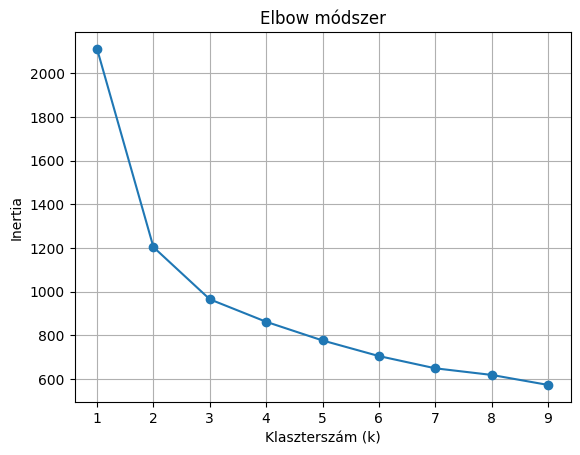

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Skálázás
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimális klaszterszám keresés (Elbow módszer)
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Klaszterszám (k)')
plt.ylabel('Inertia')
plt.title('Elbow módszer')
plt.grid()
plt.show()

In [199]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans = df_last.copy()
df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

In [200]:
res = df_kmeans[['fixture_date', 'league_name','teams_home_name', 'teams_away_name']+cols+['total_cards_value']+['cluster']]
res[res['cluster'] == 1]

,fixture_date,league_name,teams_home_name,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_total_cards,total_cards_value,cluster
3089,2022-05-22 15:00:00 UTC,Premier League,Norwich,Tottenham,0.533931,10.988550,470.786260,372.954198,0.780878,0.958015,1.320611,0.000000,4.461832,5.164122,7.950382,5.591603,13.519084,3.893130,5.297710,1.670034,4,1
3139,2023-05-28 15:30:00 UTC,Premier League,Leeds,Tottenham,0.553940,12.033113,444.741722,344.966887,0.757947,0.980132,1.344371,0.072583,4.410596,5.741722,8.443709,5.142384,13.682119,3.529801,5.678808,1.991176,3,1
490,2024-05-11 13:30:00 UTC,Bundesliga,Borussia Monchengladbach,Eintracht Frankfurt,0.519663,11.111111,496.784512,408.235690,0.808552,1.141414,1.562290,0.249899,4.909091,5.080808,8.784512,4.323232,13.164983,3.175084,4.804714,1.715569,1,1
7176,2024-05-12 15:30:00 UTC,Bundesliga,Bayern Munich,VfL Wolfsburg,0.639858,9.988636,640.497159,558.616477,0.869659,1.982955,2.664773,0.425909,7.238636,6.769886,12.235795,6.051136,18.278409,4.269886,6.852273,1.387755,2,1
6139,2024-05-19 10:30:00 UTC,Serie A,Sassuolo,Cagliari,0.508686,12.211679,453.748175,373.689781,0.800365,0.875912,1.364964,0.248394,4.605839,4.981752,7.580292,5.543796,13.237226,3.649635,5.251825,2.320809,6,1
8184,2024-11-24 19:45:00 UTC,Serie A,Lazio,Bologna,0.518813,12.000000,499.207715,420.519288,0.832344,1.142433,1.721068,0.348249,4.928783,5.065282,8.394659,4.727003,13.142433,3.148368,5.124629,2.461722,6,1
2121,2024-11-29 20:00:00 UTC,Premier League,Brighton,Southampton,0.520597,11.292537,473.531343,386.614925,0.798746,0.829851,1.211940,0.402507,4.223881,5.143284,8.202985,4.585075,12.823881,3.456716,5.128358,1.720000,6,1
5983,2024-11-30 13:00:00 UTC,La Liga,Barcelona,Las Palmas,0.644904,10.843836,640.295890,564.454795,0.877671,1.569863,2.178082,0.500575,6.016438,5.416438,9.912329,5.049315,14.936986,3.504110,5.797260,2.096413,0,1
2304,2024-11-30 14:00:00 UTC,Serie A,Como,Monza,0.556154,12.307692,485.538462,414.846154,0.849231,0.769231,0.846154,1.129231,4.384615,5.615385,8.923077,5.461538,14.384615,4.384615,4.230769,1.923077,3,1
3909,2024-11-30 14:30:00 UTC,Bundesliga,RB Leipzig,VfL Wolfsburg,0.548825,12.363897,513.074499,417.492837,0.798195,1.326648,1.859599,0.392321,5.555874,5.532951,9.598854,4.836676,14.544413,3.455587,5.255014,1.751445,3,1


In [202]:
res[res['cluster'] == 0]

,fixture_date,league_name,teams_home_name,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_total_cards,total_cards_value,cluster
3972,2016-05-08 13:00:00 UTC,Serie A,Carpi,Lazio,0.350000,13.000000,354.000000,249.000000,0.700000,0.000000,0.000000,0.000000,4.000000,8.000000,7.000000,7.000000,14.000000,2.000000,4.000000,2.972222,9,0
4372,2017-05-13 14:00:00 UTC,Premier League,Sunderland,Swansea,0.394359,11.333333,322.179487,231.897436,0.710256,0.384615,0.871795,0.000000,3.333333,3.794872,6.179487,4.461538,10.589744,3.461538,4.179487,1.986301,4,0
2845,2017-05-13 14:00:00 UTC,Premier League,Middlesbrough,Southampton,0.491026,12.461538,414.897436,322.487179,0.746410,0.512821,0.641026,0.000000,2.641026,4.153846,5.384615,3.923077,9.384615,2.589744,3.666667,1.710526,3,0
703,2017-05-20 13:30:00 UTC,Bundesliga,FC Ingolstadt 04,FC Schalke 04,0.462353,16.411765,370.470588,245.941176,0.655000,0.647059,1.058824,0.000000,4.676471,5.852941,8.000000,5.500000,13.470588,2.941176,4.588235,2.328358,2,0
2593,2017-05-20 15:00:00 UTC,La Liga,Sporting Gijon,Real Betis,0.439286,14.500000,369.928571,267.976190,0.711429,0.714286,1.071429,0.000000,3.500000,3.666667,6.000000,3.666667,9.666667,2.500000,4.523810,2.973333,2,0
3260,2017-05-21 14:00:00 UTC,Premier League,Hull City,Tottenham,0.455238,10.571429,394.833333,303.142857,0.739286,0.642857,0.928571,0.000000,3.357143,5.071429,6.142857,4.404762,10.809524,2.380952,4.642857,1.580247,0,0
11180,2017-05-22 18:45:00 UTC,Serie A,Pescara,Palermo,0.469444,14.416667,435.388889,343.750000,0.781389,0.638889,0.777778,0.000000,3.722222,4.944444,6.694444,5.000000,11.611111,2.944444,4.750000,2.666667,2,0
7329,2017-05-28 18:45:00 UTC,Serie A,Palermo,Empoli,0.456667,15.076923,413.025641,322.487179,0.771026,0.666667,0.871795,0.000000,3.051282,4.692308,5.205128,5.025641,10.230769,2.487179,4.435897,2.746667,7,0
3967,2018-05-05 11:30:00 UTC,Premier League,Stoke City,Crystal Palace,0.436026,11.500000,360.320513,265.051282,0.724487,0.717949,0.974359,0.000000,3.576923,4.371795,6.500000,4.217949,10.653846,2.705128,4.269231,1.607143,7,0
4531,2018-05-12 16:30:00 UTC,La Liga,Deportivo La Coruna,Villarreal,0.466923,13.371795,395.076923,305.923077,0.767821,0.756410,1.025641,0.000000,3.628205,5.589744,7.282051,4.782051,12.051282,2.833333,5.179487,2.473214,3,0


In [221]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans2 = df_last.copy()
df_kmeans2['cluster'] = kmeans.fit_predict(X_scaled)
res2 = df_kmeans2[['fixture_date', 'league_name','teams_home_name', 'teams_away_name']+cols+['total_cards_value']+['cluster']]

In [258]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, df_kmeans2['cluster'])
silhouette_score(X_scaled, res['cluster'])
silhouette_score(X_scaled, res3['dbscan_cluster'])


np.float64(0.25978148403913726)

In [224]:
res2[res2['cluster'] == 0]

,fixture_date,league_name,teams_home_name,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_total_cards,total_cards_value,cluster
3972,2016-05-08 13:00:00 UTC,Serie A,Carpi,Lazio,0.350000,13.000000,354.000000,249.000000,0.700000,0.000000,0.000000,0.000000,4.000000,8.000000,7.000000,7.000000,14.000000,2.000000,4.000000,2.972222,9,0
4372,2017-05-13 14:00:00 UTC,Premier League,Sunderland,Swansea,0.394359,11.333333,322.179487,231.897436,0.710256,0.384615,0.871795,0.000000,3.333333,3.794872,6.179487,4.461538,10.589744,3.461538,4.179487,1.986301,4,0
2845,2017-05-13 14:00:00 UTC,Premier League,Middlesbrough,Southampton,0.491026,12.461538,414.897436,322.487179,0.746410,0.512821,0.641026,0.000000,2.641026,4.153846,5.384615,3.923077,9.384615,2.589744,3.666667,1.710526,3,0
703,2017-05-20 13:30:00 UTC,Bundesliga,FC Ingolstadt 04,FC Schalke 04,0.462353,16.411765,370.470588,245.941176,0.655000,0.647059,1.058824,0.000000,4.676471,5.852941,8.000000,5.500000,13.470588,2.941176,4.588235,2.328358,2,0
2593,2017-05-20 15:00:00 UTC,La Liga,Sporting Gijon,Real Betis,0.439286,14.500000,369.928571,267.976190,0.711429,0.714286,1.071429,0.000000,3.500000,3.666667,6.000000,3.666667,9.666667,2.500000,4.523810,2.973333,2,0
3260,2017-05-21 14:00:00 UTC,Premier League,Hull City,Tottenham,0.455238,10.571429,394.833333,303.142857,0.739286,0.642857,0.928571,0.000000,3.357143,5.071429,6.142857,4.404762,10.809524,2.380952,4.642857,1.580247,0,0
11180,2017-05-22 18:45:00 UTC,Serie A,Pescara,Palermo,0.469444,14.416667,435.388889,343.750000,0.781389,0.638889,0.777778,0.000000,3.722222,4.944444,6.694444,5.000000,11.611111,2.944444,4.750000,2.666667,2,0
7329,2017-05-28 18:45:00 UTC,Serie A,Palermo,Empoli,0.456667,15.076923,413.025641,322.487179,0.771026,0.666667,0.871795,0.000000,3.051282,4.692308,5.205128,5.025641,10.230769,2.487179,4.435897,2.746667,7,0
3967,2018-05-05 11:30:00 UTC,Premier League,Stoke City,Crystal Palace,0.436026,11.500000,360.320513,265.051282,0.724487,0.717949,0.974359,0.000000,3.576923,4.371795,6.500000,4.217949,10.653846,2.705128,4.269231,1.607143,7,0
4531,2018-05-12 16:30:00 UTC,La Liga,Deportivo La Coruna,Villarreal,0.466923,13.371795,395.076923,305.923077,0.767821,0.756410,1.025641,0.000000,3.628205,5.589744,7.282051,4.782051,12.051282,2.833333,5.179487,2.473214,3,0


<Figure size 1200x600 with 0 Axes>

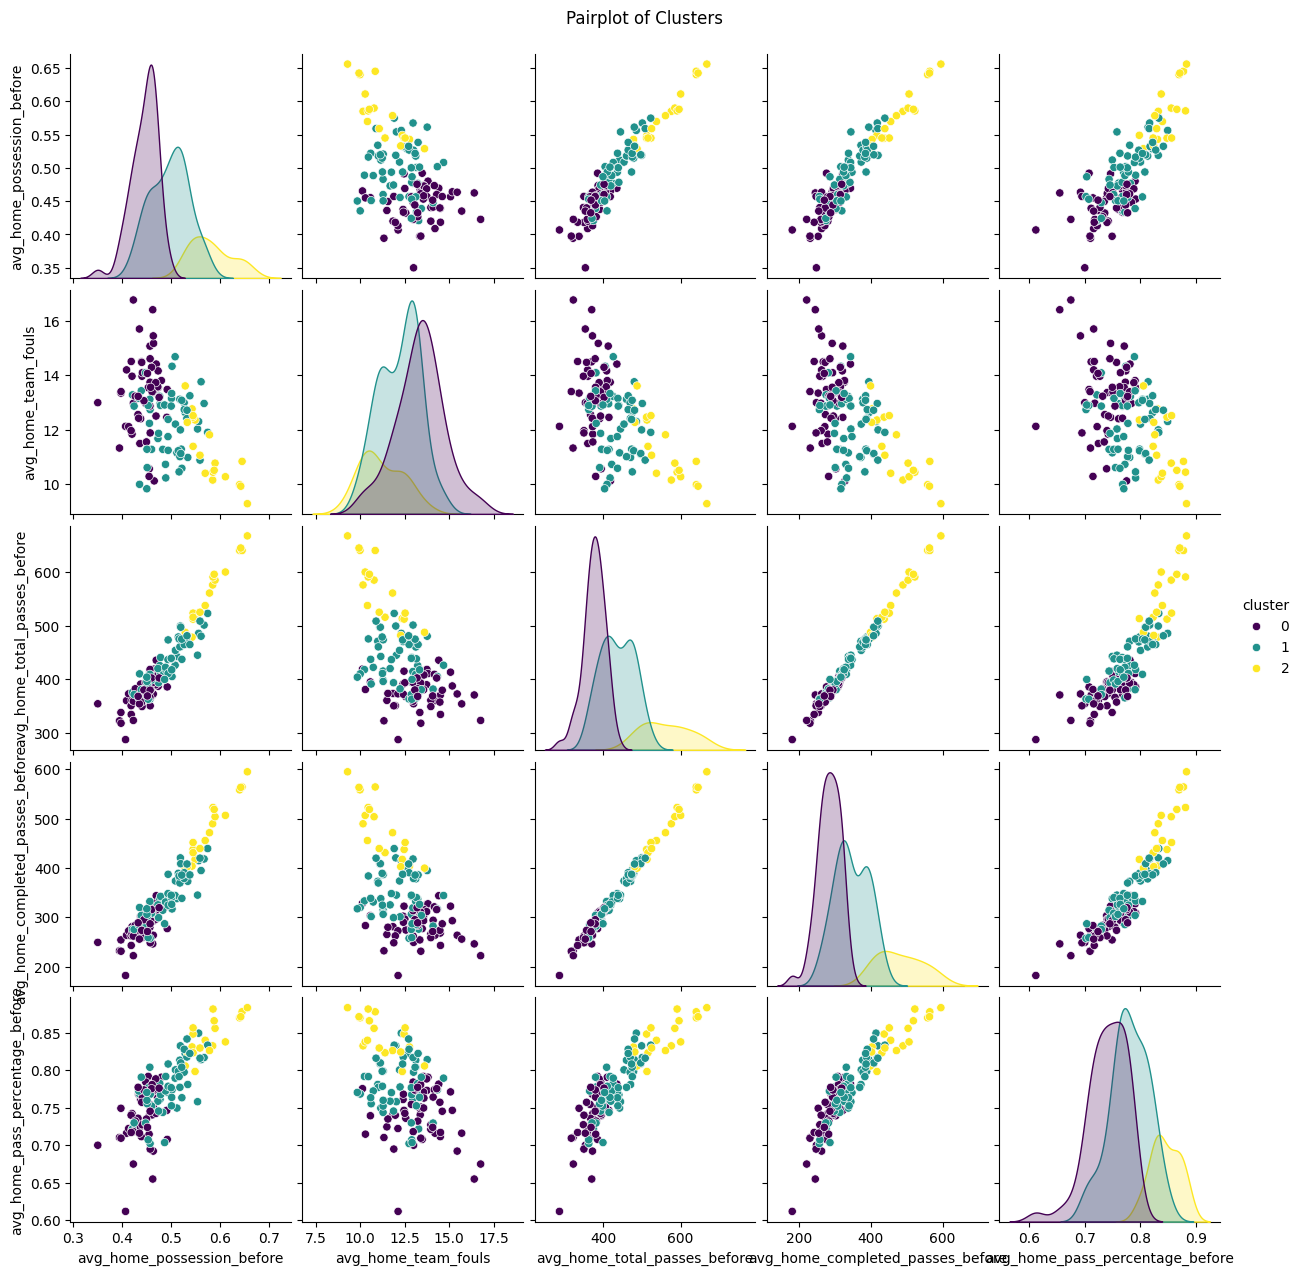

In [225]:
# prompt: visualize the difference between cluster 0,1 and 2

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'res2' DataFrame from your code is available

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.pairplot(res2, hue='cluster', vars=cols[:5], palette='viridis') # Visualize the first 5 columns from the 'cols' list
plt.suptitle('Pairplot of Clusters', y=1.02)  # Add title
plt.show()


In [254]:
from sklearn.cluster import DBSCAN

df_dbscan = df_last.copy()
dbscan = DBSCAN(eps=2.5, min_samples=4)  # eps-t érdemes majd finomhangolni
df_dbscan['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [255]:
res3 = df_dbscan[['fixture_date', 'league_name','teams_home_name', 'teams_away_name']+cols+['total_cards_value']+['dbscan_cluster']]
res3.dbscan_cluster.value_counts()

,count
dbscan_cluster,
0,114
-1,14
1,4


In [262]:
res3[res3['dbscan_cluster'] == 1]

,fixture_date,league_name,teams_home_name,teams_away_name,avg_home_possession_before,avg_home_team_fouls,avg_home_total_passes_before,avg_home_completed_passes_before,avg_home_pass_percentage_before,avg_home_assists_before,avg_home_goals_before,avg_home_expected_goals_before,avg_home_shots_on_goal_before,avg_home_shots_off_goal_before,avg_home_shots_insidebox_before,avg_home_shots_outsidebox_before,avg_home_total_shots_before,avg_home_blocked_shots_before,avg_home_corner_kicks_before,avg_home_total_cards,total_cards_value,dbscan_cluster
7176,2024-05-12 15:30:00 UTC,Bundesliga,Bayern Munich,VfL Wolfsburg,0.639858,9.988636,640.497159,558.616477,0.869659,1.982955,2.664773,0.425909,7.238636,6.769886,12.235795,6.051136,18.278409,4.269886,6.852273,1.387755,2,1
6361,2024-12-01 16:00:00 UTC,Premier League,Liverpool,Manchester City,0.610806,10.279597,600.098237,506.740554,0.837607,1.559194,2.113350,0.486272,6.211587,5.994962,11.158690,5.634761,16.780856,4.574307,6.634761,1.375566,4,1
7581,2024-12-04 19:30:00 UTC,Premier League,Manchester City,Nottingham Forest,0.655718,9.289538,667.620438,595.255474,0.883139,1.712895,2.360097,0.485645,6.493917,6.000000,11.362530,5.807786,17.221411,4.727494,7.145985,1.456954,6,1
7125,2024-12-07 14:30:00 UTC,Bundesliga,Bayern München,1. FC Heidenheim,0.642183,9.932615,644.981132,563.630728,0.871105,1.962264,2.665768,0.517817,7.274933,6.708895,12.229111,6.064690,18.285714,4.301887,6.857143,1.381995,1,1


<Figure size 1200x600 with 0 Axes>

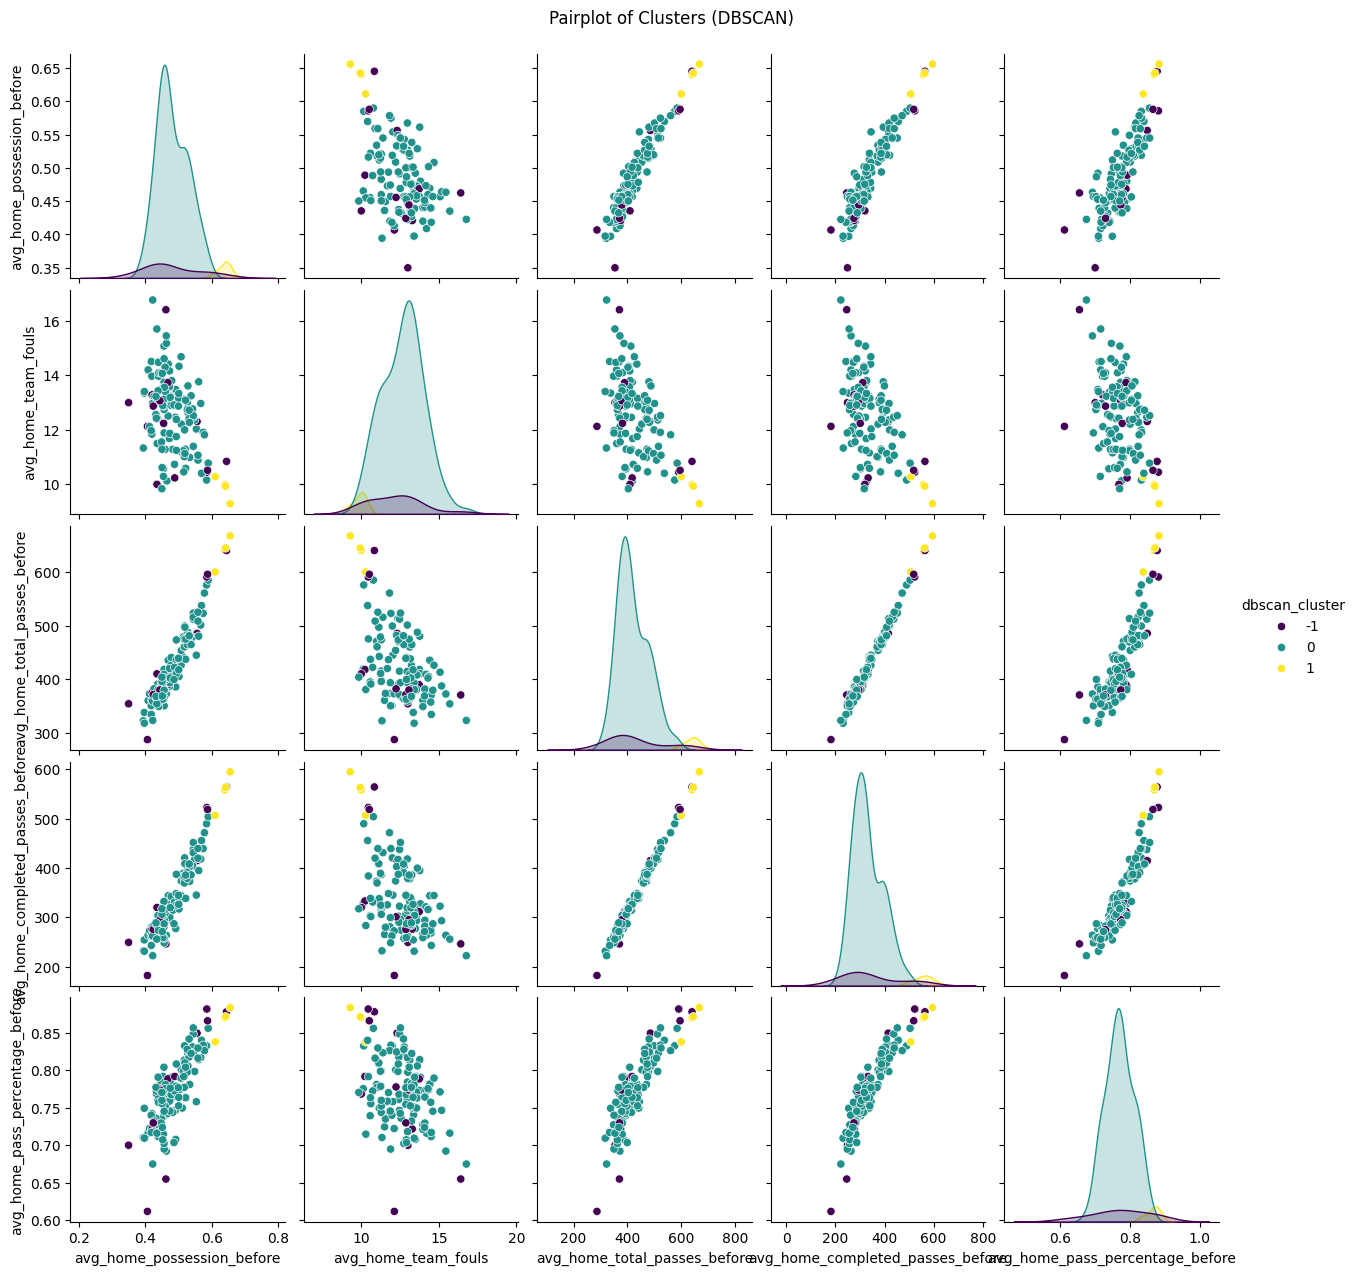

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.pairplot(res3, hue='dbscan_cluster', vars=cols[:5], palette='viridis')
plt.suptitle('Pairplot of Clusters (DBSCAN)', y=1.02)
plt.show()


# Klaszterezések játékos statokkal - sikertelen

In [167]:
# players = pd.read_csv("fixture_stats_players_clean.csv")

In [168]:
# players

In [169]:
# # Négy topliga kiszűrése: fix_player_topleagues, fix_player_topleagues22
# top_leagues = ["La Liga", "Serie A", "Bundesliga", "Premier League"]
# fix_clean = fix_clean[fix_clean["league_name"].isin(top_leagues)]

# teams_to_keep = list(set(list(fix_clean.teams_home_name.unique())+list(fix_clean.teams_away_name.unique())))

# player_topleague = players[players['team_name'].isin(teams_to_keep)]

In [170]:
# player_topleague.columns

In [171]:
# player_topleague11 = player_topleague.sort_values('game_minutes', ascending=False).groupby(['fixture_id', 'team_id'], group_keys=False).head(11)

In [172]:
# player_topleague11[player_topleague11['fixture_id'] == 214359].sort_values('team_id')

In [173]:
# # player_stat_cols = ['shots_total', 'shots_on',
# #        'goals_total', 'goals_conceded', 'assists', 'saves', 'total_passes',
# #        'completed_passes', 'pass_percentage', 'key_passes', 'total_tackles',
# #        'blocks_tackles', 'interceptions_tackles', 'duels_total', 'duels_won',
# #        'dribbles_attempts', 'dribbles_success', 'dribbles_past', 'fouls_drawn',
# #        'fouls_committed', 'yellow_cards', 'red_cards', 'penalty_won',
# #        'penalty_committed', 'penalty_scored', 'penalty_missed',
# #        'penalty_saved']
# player_stat_cols = ['fouls_drawn',
#        'fouls_committed', 'yellow_cards', 'red_cards']

In [174]:
# player_topleague11['player_num'] = player_topleague11.groupby(['fixture_id', 'team_id']).cumcount() + 1

# pivoted_player_topleague11 = player_topleague11.pivot_table(
#     index=['fixture_id', 'team_id'],
#     columns='player_num',
#     values=player_stat_cols
# )

# pivoted_player_topleague11.columns = [
#     f'{stat}_player_{num}'
#     for stat, num in pivoted_player_topleague11.columns
# ]

# pivoted_player_topleague11.reset_index(inplace=True)

In [175]:
# pivoted_player_topleague11

In [176]:
# to_cluster = df_last.merge(pivoted_player_topleague11, left_on=["fixture_id", "teams_home_id"], right_on=["fixture_id", "team_id"], how="inner")

In [177]:
# not_needed = ['fixture_id', 'fixture_date', 'fixture_referee', 'league_id',
#        'league_name', 'teams_home_id', 'teams_home_name', 'teams_away_id',
#        'teams_away_name', 'avg_away_possession_before',
#  'avg_away_team_fouls',
#  'avg_away_total_passes_before',
#  'avg_away_completed_passes_before',
#  'avg_away_pass_percentage_before',
#  'avg_away_assists_before',
#  'avg_away_goals_before',
#  'avg_away_expected_goals_before',
#  'avg_away_shots_on_goal_before',
#  'avg_away_shots_off_goal_before',
#  'avg_away_shots_insidebox_before',
#  'avg_away_shots_outsidebox_before',
#  'avg_away_total_shots_before',
#  'avg_away_blocked_shots_before',
#  'avg_away_corner_kicks_before',
#  'avg_away_offsides_before','away_total_cards_value',
#  'avg_away_total_cards',
#  'away_matches_last_14_days',
#  'total_cards_value',
#  'avg_referee_cards',
#  'avg_cards_per_90',
#  'avg_fouls_per_90',
#               'player_1_avg_cards_per_90',
#  'player_2_avg_cards_per_90',
#  'player_3_avg_cards_per_90',
#  'player_4_avg_cards_per_90',
#  'player_5_avg_cards_per_90',
#  'player_6_avg_cards_per_90',
#  'player_7_avg_cards_per_90',
#  'player_8_avg_cards_per_90',
#  'player_9_avg_cards_per_90',
#  'player_10_avg_cards_per_90',
#  'player_11_avg_cards_per_90',
#  'player_12_avg_cards_per_90',
#  'player_13_avg_cards_per_90',
#  'player_14_avg_cards_per_90',
#  'player_15_avg_cards_per_90',
#  'player_16_avg_cards_per_90',
#  'player_17_avg_cards_per_90',
#  'player_18_avg_cards_per_90',
#  'player_19_avg_cards_per_90',
#  'player_20_avg_cards_per_90',
#  'player_21_avg_cards_per_90',
#  'player_22_avg_cards_per_90',
#  'player_1_avg_fouls_per_90',
#  'player_2_avg_fouls_per_90',
#  'player_3_avg_fouls_per_90',
#  'player_4_avg_fouls_per_90',
#  'player_5_avg_fouls_per_90',
#  'player_6_avg_fouls_per_90',
#  'player_7_avg_fouls_per_90',
#  'player_8_avg_fouls_per_90',
#  'player_9_avg_fouls_per_90',
#  'player_10_avg_fouls_per_90',
#  'player_11_avg_fouls_per_90',
#  'player_12_avg_fouls_per_90',
#  'player_13_avg_fouls_per_90',
#  'player_14_avg_fouls_per_90',
#  'player_15_avg_fouls_per_90',
#  'player_16_avg_fouls_per_90',
#  'player_17_avg_fouls_per_90',
#  'player_18_avg_fouls_per_90',
#  'player_19_avg_fouls_per_90',
#  'player_20_avg_fouls_per_90',
#  'player_21_avg_fouls_per_90',
#  'player_22_avg_fouls_per_90',]
# l = [c for c in to_cluster.columns if c not in not_needed]

In [178]:
# l

In [179]:
# X = to_cluster[l]

In [180]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Skálázás
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Optimális klaszterszám keresés (Elbow módszer)
# inertia = []
# K = range(1, 10)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# plt.plot(K, inertia, marker='o')
# plt.xlabel('Klaszterszám (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow módszer')
# plt.grid()
# plt.show()

In [181]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# df_kmeans = to_cluster.copy()
# df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

In [182]:
# res = df_kmeans[['fixture_date', 'league_name','teams_home_name', 'teams_away_name']+['total_cards_value']+['cluster']+l]
# res[res['cluster'] == 0]

In [183]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# X = df_last[['avg_home_possession_before', 'avg_home_team_fouls',
#        'avg_home_total_passes_before', 'avg_home_completed_passes_before',
#        'avg_home_pass_percentage_before', 'avg_home_assists_before',
#        'avg_home_goals_before', 'avg_home_expected_goals_before',
#        'avg_home_shots_on_goal_before', 'avg_home_shots_off_goal_before',
#        'avg_home_shots_insidebox_before', 'avg_home_shots_outsidebox_before',
#        'avg_home_total_shots_before', 'avg_home_blocked_shots_before',
#        'avg_home_corner_kicks_before', 'avg_home_offsides_before',
#        'home_matches_last_14_days','player_1_avg_cards_per_90',
#        'player_2_avg_cards_per_90', 'player_3_avg_cards_per_90',
#        'player_4_avg_cards_per_90', 'player_5_avg_cards_per_90',
#        'player_6_avg_cards_per_90', 'player_7_avg_cards_per_90',
#        'player_8_avg_cards_per_90', 'player_9_avg_cards_per_90',
#        'player_10_avg_cards_per_90', 'player_11_avg_cards_per_90',
#        'player_12_avg_cards_per_90', 'player_13_avg_cards_per_90',
#        'player_14_avg_cards_per_90', 'player_15_avg_cards_per_90',
#        'player_16_avg_cards_per_90', 'player_17_avg_cards_per_90',
#        'player_18_avg_cards_per_90', 'player_19_avg_cards_per_90',
#        'player_20_avg_cards_per_90', 'player_21_avg_cards_per_90',
#        'player_22_avg_cards_per_90', 'player_1_avg_fouls_per_90',
#        'player_2_avg_fouls_per_90', 'player_3_avg_fouls_per_90',
#        'player_4_avg_fouls_per_90', 'player_5_avg_fouls_per_90',
#        'player_6_avg_fouls_per_90', 'player_7_avg_fouls_per_90',
#        'player_8_avg_fouls_per_90', 'player_9_avg_fouls_per_90',
#        'player_10_avg_fouls_per_90', 'player_11_avg_fouls_per_90',
#        'player_12_avg_fouls_per_90', 'player_13_avg_fouls_per_90',
#        'player_14_avg_fouls_per_90', 'player_15_avg_fouls_per_90',
#        'player_16_avg_fouls_per_90', 'player_17_avg_fouls_per_90',
#        'player_18_avg_fouls_per_90', 'player_19_avg_fouls_per_90',
#        'player_20_avg_fouls_per_90', 'player_21_avg_fouls_per_90',
#        'player_22_avg_fouls_per_90']]
# # Skálázás
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Optimális klaszterszám keresés (Elbow módszer)
# inertia = []
# K = range(1, 10)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# plt.plot(K, inertia, marker='o')
# plt.xlabel('Klaszterszám (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow módszer')
# plt.grid()
# plt.show()

In [184]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# df_kmeans = df_last.copy()
# df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

In [185]:
# res = df_kmeans[['fixture_date', 'league_name','teams_home_name', 'teams_away_name']+cols+['total_cards_value']+['cluster']]
# res[res['cluster'] == 1]

# kezdeti próbálkozás - regresszió

In [186]:

# df = pd.get_dummies(df, columns=['league_name','teams_home_name','teams_away_name'])
# prefixes = ['league_name', 'teams_home_name', 'teams_away_name']

# # Filter columns that start with any of the given prefixes
# cols_to_convert = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]

# # Convert those columns to int (0 and 1)
# df[cols_to_convert] = df[cols_to_convert].astype(int)
# display(df.head())

In [187]:
# from sklearn.preprocessing import MinMaxScaler


# X = df.drop(columns=["fixture_id","league_id","fixture_referee","total_cards_value","fixture_date","fixture_referee", \
#                      "teams_home_id","teams_away_id",'home_total_cards_value','away_total_cards_value'])
# y = df["total_cards_value"]

# scaler = MinMaxScaler()

# train_size = int(0.7 * len(df))
# X_train = X[:train_size]
# X_test = X[train_size:]
# y_train = y[:train_size]
# y_test = y[train_size:]


# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# print("Training data shape:", X_train.shape)
# print("Testing data shape:", X_test.shape)

In [188]:
# X.columns.tolist()

In [189]:
# df.head(30)
# # szabadrugasok, golok, meg feautre
# #jobban megszoritott modell

In [190]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error

In [191]:
# rf = RandomForestRegressor(random_state=42)

# rf_params = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# rf_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=rf_params,
#     n_iter=3,  # Number of random parameter combinations to try
#     cv=3,  # 5-fold cross-validation
#     scoring='neg_mean_absolute_error',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Use all CPU cores
# )
# rf_search.fit(X_train, y_train)

# best_rf_params = rf_search.best_params_
# print(f"Best RF Parameters: {best_rf_params}")

In [192]:
# import xgboost as xg

In [193]:

# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 6, 9],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_lambda': [1, 10, 100],
# }

# # Randomized search
# xgb_reg = xg.XGBRegressor(objective='reg:squarederror', random_state=42)
# random_search = RandomizedSearchCV(xgb_reg, param_grid, n_iter=3, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)
# random_search.fit(X_train, y_train)

# # Best model
# best_xgb = random_search.best_params_
# print("Best Parameters:", random_search.best_params_)

In [194]:
# rf = RandomForestRegressor()
# xgb = xg.XGBRegressor()
# lr = LinearRegression()

# rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)
# lr.fit(X_train, y_train)


# rf_pred = rf.predict(X_test)
# xgb_pred = xgb.predict(X_test)
# lr_pred = lr.predict(X_test)

# final_pred = (rf_pred + xgb_pred + lr_pred) / 3

# score = r2_score(y_test,final_pred)

# print('mean_abs_error: ',mean_absolute_error(y_test,final_pred))
# print('mean_sqrd_error: ',mean_squared_error(y_test,final_pred))
# print('r2 score: ',score)
# print(r2_score(y_test,rf_pred))
# print(r2_score(y_test,xgb_pred))
# print(r2_score(y_test, lr_pred))


In [195]:
# importances = rf.feature_importances_
# feature_names = X.columns

# # Get the index of the maximum feature importance
# max_index = np.argmax(importances)

# # Get the maximum feature importance value and corresponding column name
# max_importance = importances[max_index]
# corresponding_column = feature_names[max_index]


# print(max_importance, corresponding_column)

In [196]:
# rf_pred = rf.predict(X_train)
# xgb_pred = xgb.predict(X_train)
# lr_pred = lr.predict(X_train)

# final_pred = (rf_pred + xgb_pred + lr_pred) / 3

# score = r2_score(y_train,final_pred)

# print('mean_abs_error: ',mean_absolute_error(y_train,final_pred))
# print('mean_sqrd_error: ',mean_squared_error(y_train,final_pred))
# print('r2 score: ',score)
# print(r2_score(y_train,rf_pred))
# print(r2_score(y_train,xgb_pred))
# print(r2_score(y_train, lr_pred))